<a href="https://colab.research.google.com/github/miadibe/CASA0004/blob/master/02_FloorClassification_Fastai_BIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Floor Classifier - BIM images**

In [ ]:
u = 'username';
p = 'password'; 
!git clone https://$u:$p@github.com/$u/AEC-Demo.git

Cloning into 'AEC-Demo'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 4893 (delta 0), reused 120 (delta 0), pack-reused 4773
Receiving objects: 100% (4893/4893), 13.30 GiB | 26.23 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Checking out files: 100% (5324/5324), done.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
from fastai.utils import *
show_install()



```text
=== Software === 
python        : 3.6.9
fastai        : 1.0.61
fastprogress  : 0.2.3
torch         : 1.5.1+cu101
nvidia driver : 418.67
torch cuda    : 10.1 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Wed Feb 19 05:26:34 PST 2020
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run

In [ ]:
path = Path('/content/AEC-Demo')

In [ ]:
path_img = path/'bim'

In [ ]:
fnames = get_image_files(path_img)
print(len(fnames))
fnames[:5]

668


[PosixPath('/content/AEC-Demo/bim/2004111200000000_14-floors.png'),
 PosixPath('/content/AEC-Demo/bim/1907061200000000_1-floor.png'),
 PosixPath('/content/AEC-Demo/bim/2102191200000000_15-floors.png'),
 PosixPath('/content/AEC-Demo/bim/1905271200000000_0-floor.png'),
 PosixPath('/content/AEC-Demo/bim/2005211200000000_14-floors.png')]

In [ ]:
# filter out empty jpg files by size>0 and sort
fnames = [fname.name for fname in sorted(fnames) if os.path.getsize(fname)>0]
print(len(fnames))
fnames[:5]

668


['1812121200000000_0-floor.png',
 '1812131200000000_0-floor.png',
 '1812141200000000_0-floor.png',
 '1812151200000000_0-floor.png',
 '1812161200000000_0-floor.png']

In [ ]:
df = pd.DataFrame(fnames,columns=['fnames'])
df.head()

,fnames
0,1812121200000000_0-floor.png
1,1812131200000000_0-floor.png
2,1812141200000000_0-floor.png
3,1812151200000000_0-floor.png
4,1812161200000000_0-floor.png


In [ ]:
# hand-picked val grids
holdout_grids = ['1810','1811','1812']
valid_idx = [i for i,o in df.iterrows() if any(c in str(o.fnames) for c in holdout_grids)]

In [ ]:
df.iloc[valid_idx].head()

,fnames
0,1812121200000000_0-floor.png
1,1812131200000000_0-floor.png
2,1812141200000000_0-floor.png
3,1812151200000000_0-floor.png
4,1812161200000000_0-floor.png


In [ ]:
# pulled out of fastai/data.py
pat = r'([^_]+).png$'
pat = re.compile(pat)
def get_label(fn): return pat.search(str(fn)).group(1)

In [ ]:
src = (ImageList.from_df(df, folder='bim', path=path)
        .split_by_idx(valid_idx)
        .label_from_func(get_label, classes=['0-floor', '1-floor', '2-floors', '3-floors',
                                             '4-floors','5-floors','6-floors','7-floors','8-floors',
                                             '9-floors','10-floors','11-floors','12-floors','13-floors',
                                             '14-floors','15-floors']))

In [ ]:
bs = 16
sz = 128
tfms = get_transforms(flip_vert=True, max_rotate=0.2, max_warp=0., max_zoom=1.1, max_lighting=0.4)
data = (src.transform(tfms, size=128, resize_method=ResizeMethod.SQUISH, padding_mode='zeros')
        .databunch(bs=bs)
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
data

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

ImageDataBunch;

Train: LabelList (626 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0-floor,0-floor,0-floor,0-floor,0-floor
Path: /content/AEC-Demo;

Valid: LabelList (42 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0-floor,0-floor,0-floor,0-floor,0-floor
Path: /content/AEC-Demo;

Test: None

In [ ]:
data.train_ds.classes

['0-floor',
 '1-floor',
 '2-floors',
 '3-floors',
 '4-floors',
 '5-floors',
 '6-floors',
 '7-floors',
 '8-floors',
 '9-floors',
 '10-floors',
 '11-floors',
 '12-floors',
 '13-floors',
 '14-floors',
 '15-floors']

0-floor /content/AEC-Demo/bim/1812121200000000_0-floor.png


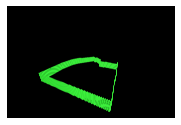

0-floor /content/AEC-Demo/bim/1812131200000000_0-floor.png


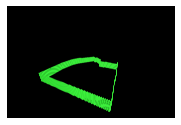

0-floor /content/AEC-Demo/bim/1812141200000000_0-floor.png


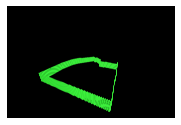

0-floor /content/AEC-Demo/bim/1812151200000000_0-floor.png


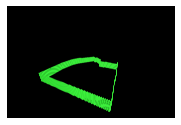

0-floor /content/AEC-Demo/bim/1812161200000000_0-floor.png


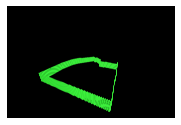

In [ ]:
for i in range(5):
    print(data.valid_ds.classes[data.valid_ds.y[i].data], data.valid_ds.items[i]); 
    data.valid_ds.x[i].show()
    plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

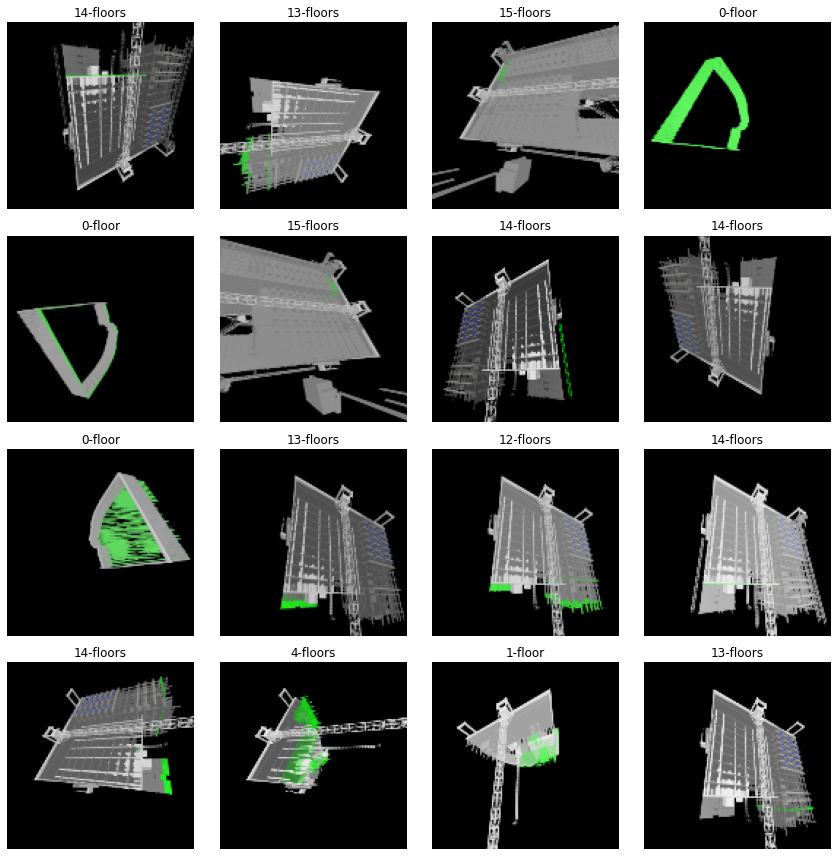

In [ ]:
data.show_batch(rows=4, figsize=(12,12))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

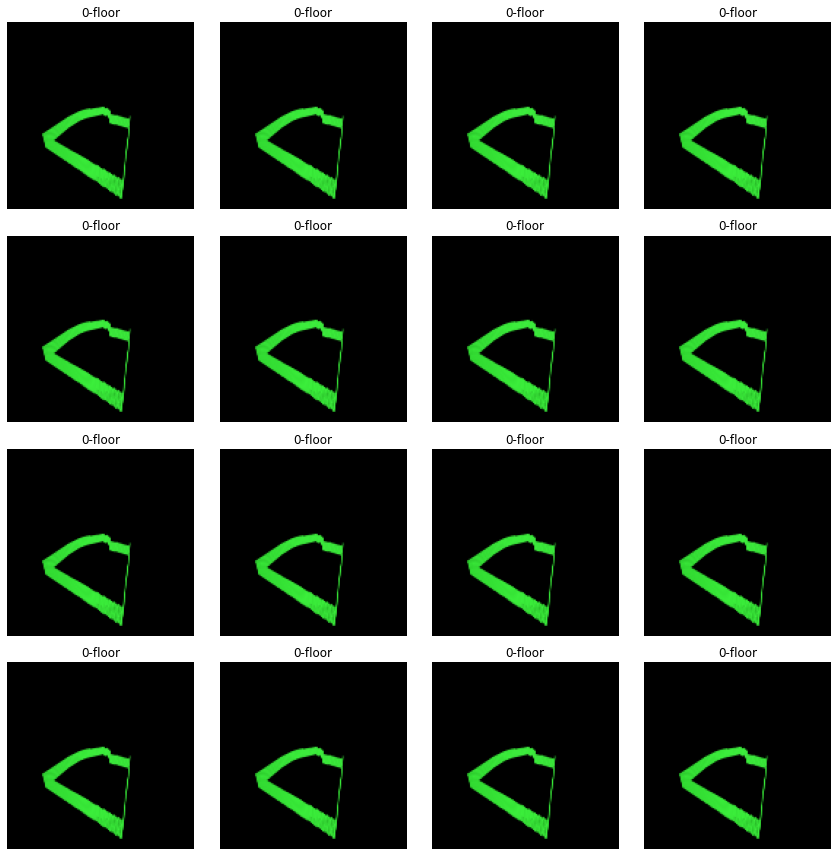

In [ ]:
data.show_batch(rows=4, figsize=(12,12), ds_type=DatasetType.Valid)

In [ ]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


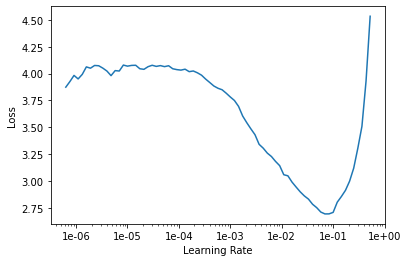

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-2

In [ ]:
## IGNORE THIS and run next line

from fastai.callbacks import *

# small change to SaveModelCallback() to add printouts
@dataclass
class SaveModelCallbackVerbose(TrackerCallback):
    "A `TrackerCallback` that saves the model when monitored quantity is best."
    every:str='improvement'
    name:str='bestmodel'
    def __post_init__(self):
        if self.every not in ['improvement', 'epoch']:
            warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')
            self.every = 'improvement'
        super().__post_init__()

    def on_epoch_end(self, epoch, **kwargs:Any)->None:
        if self.every=="epoch": self.learn.save(f'{self.name}_{epoch}')
        else: #every="improvement"
            current = self.get_monitor_value()
            if current is not None and self.operator(current, self.best):
                self.best = current
                self.learn.save(f'{self.name}')
                print(f'saved model at epoch {epoch} with {self.monitor} value: {current}')

    def on_train_end(self, **kwargs):
        if self.every=="improvement": self.learn.load(f'{self.name}')

In [ ]:
#!pip install -q git+https://github.com/fastai/fastprogress --upgrade
#!pip install -q git+https://github.com/fastai/fastcore --upgrade
#!pip install -q git+https://github.com/fastai/fastai2 --upgrade

In [ ]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if self.best_acc == None or acc > self.best_acc:
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best accuracy {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Accuracy is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, callback_fns=SaveBestModel)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10, max_lr=lr)

In [ ]:
#learn.fit_one_cycle(10, max_lr=lr, callbacks=[SaveModelCallbackVerbose(learn,monitor='error_rate',mode='min',name='20181206-rn50class-stage1-best')])

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


IndexError: ignored

In [ ]:
#Stage 2
learn = cnn_learner(data, models.resnet50, metrics=accuracy, callback_fns=SaveBestModel)
learn.fit_one_cycle(10, max_lr=slice(3e-5,lr/5))

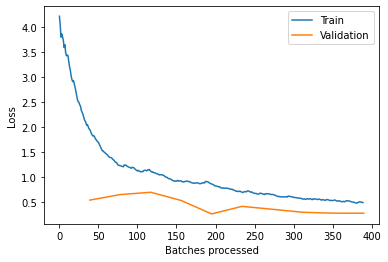

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# look at results
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

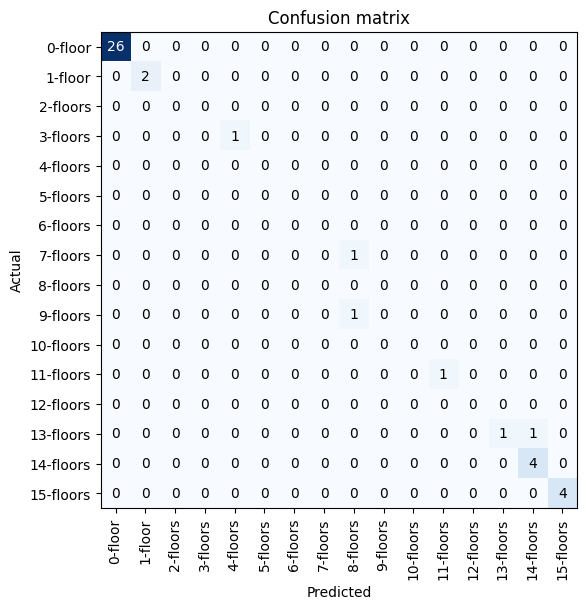

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

In [ ]:
interp.most_confused(min_val=2)

[]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

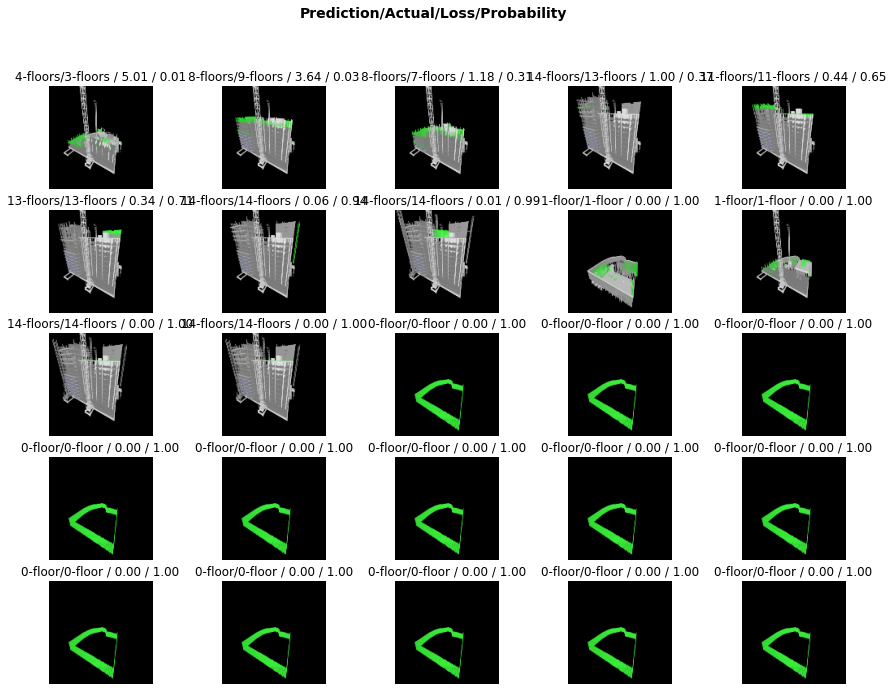

In [ ]:
interp.plot_top_losses(25, figsize=(15,11))

In [ ]:
## TEST TIME! 

In [ ]:
data.classes

['0-floor',
 '1-floor',
 '2-floors',
 '3-floors',
 '4-floors',
 '5-floors',
 '6-floors',
 '7-floors',
 '8-floors',
 '9-floors',
 '10-floors',
 '11-floors',
 '12-floors',
 '13-floors',
 '14-floors',
 '15-floors']

In [ ]:
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
test_path = Path(f'/content/test')
test_fns = [o for o in sorted(test_path.iterdir()) if '.png' in o.name]
print(len(test_fns))

16


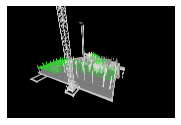

In [ ]:
img = open_image(test_fns[10])
img.show()
plt.show()

In [ ]:
learn.predict(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


(Category tensor(4),
 tensor(4),
 tensor([4.2053e-05, 8.5286e-05, 8.4675e-04, 7.8960e-02, 9.0049e-01, 1.8051e-02,
         6.5727e-04, 8.5135e-05, 3.2305e-04, 1.0697e-04, 3.0152e-05, 2.1319e-04,
         6.6386e-05, 1.9863e-06, 1.4260e-06, 4.2251e-05]))

In [ ]:
from tqdm import tqdm

In [ ]:
preds = []
pred_classes = []
for fn in tqdm(test_fns):
    try: 
        img = open_image(fn)
        img = img.apply_tfms(tfms[1],resize_method=ResizeMethod.SQUISH, padding_mode='zeros')
        pred_class,pred_idx,outputs = learn.predict(img)
        preds.append(list(to_np(outputs)))
        pred_classes.append(str(pred_class))
    except Exception as exc: 
        print(f'{exc}') 
        preds.append([-1,-1,-1,-1])
        pred_classes.append('error')

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
  6%|▋         | 1/16 [00:00<00:09,  1.51it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation 

In [ ]:
np.round(preds,2)

array([[1.  , 0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.14, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.92, 0.01, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
df = pd.DataFrame(data=preds, columns=data.classes)
df['fname'] = [o.name for o in test_fns[:len(preds)]]
df['predicted_class'] = pred_classes

In [ ]:
df.head(16)

,0-floor,1-floor,2-floors,3-floors,4-floors,5-floors,6-floors,7-floors,8-floors,9-floors,10-floors,11-floors,12-floors,13-floors,14-floors,15-floors,fname,predicted_class
0,9.997444e-01,3.507296e-06,6.603140e-06,8.584218e-07,2.882241e-05,9.042848e-05,2.877213e-05,3.602826e-05,1.610042e-05,5.579589e-06,1.604388e-05,7.631689e-06,1.504622e-05,1.778437e-08,1.607947e-08,2.335987e-07,example0f.png,0-floor
1,1.098696e-05,2.525105e-04,1.742364e-04,1.298742e-03,3.450354e-05,4.456836e-04,3.497889e-04,7.718824e-04,4.313914e-03,9.791281e-03,9.434521e-01,3.746717e-02,1.196148e-03,4.251827e-04,1.523556e-05,7.101568e-07,example10f.png,10-floors
2,1.989255e-06,2.087758e-05,1.000986e-04,1.176656e-04,1.160931e-04,3.492272e-03,5.388763e-03,2.378268e-03,8.648580e-03,5.636383e-03,5.374440e-03,8.136201e-01,1.426003e-01,1.244427e-02,5.201172e-05,7.902373e-06,example11f.png,11-floors
3,2.308165e-07,1.115444e-05,3.495238e-05,2.012654e-04,1.137169e-05,4.827460e-05,1.231293e-04,4.182131e-05,2.742972e-04,2.512605e-04,3.799564e-02,3.512439e-02,9.206479e-01,5.135703e-03,9.738725e-05,1.045974e-06,example12f.png,12-floors
4,2.187277e-06,1.319589e-06,4.222184e-05,5.549681e-05,1.426036e-05,7.509385e-05,3.040287e-05,2.090132e-04,3.145028e-03,4.859037e-04,1.228377e-03,1.717914e-01,6.144702e-02,7.095127e-01,5.195036e-02,9.297589e-06,example13f.png,13-floors
5,1.623199e-07,3.730453e-07,1.029596e-05,1.975474e-05,2.197141e-06,1.416049e-06,8.224645e-07,6.658631e-06,1.054839e-06,6.454090e-07,1.523034e-05,1.821836e-04,3.733711e-04,1.053760e-01,8.940098e-01,6.149359e-08,example14f.png,14-floors
6,8.934768e-11,1.273598e-10,9.515200e-08,4.435190e-06,2.204210e-06,3.624332e-06,1.582708e-05,5.772945e-08,1.840267e-06,6.718668e-06,2.945779e-07,5.961824e-08,5.692415e-08,2.529407e-08,1.802913e-09,9.999648e-01,example15f.png,15-floors
7,8.160444e-06,9.999918e-01,4.957800e-09,1.375963e-08,3.707107e-09,4.161578e-09,2.562159e-08,1.948214e-08,4.939746e-08,2.009885e-08,3.124412e-10,1.779021e-10,1.080981e-08,8.267714e-10,1.135722e-08,1.142379e-09,example1f.png,1-floor
8,1.352933e-04,3.579971e-03,6.840061e-01,2.311952e-01,6.912058e-02,7.798107e-03,6.817533e-04,3.364518e-04,6.860816e-04,5.491792e-04,5.200972e-04,2.733372e-04,2.953028e-04,2.337477e-04,3.853413e-05,5.503236e-04,example2f.png,2-floors
9,3.379113e-05,1.106032e-04,1.183751e-03,6.669926e-03,9.738033e-01,1.720306e-02,5.662334e-04,1.772446e-04,7.005718e-05,2.427986e-05,9.296132e-06,6.685025e-05,4.813950e-05,9.290097e-06,2.051877e-06,2.208810e-05,example3f.png,4-floors


In [ ]:
pred_classes[:5]

['0-floor', '10-floors', '11-floors', '12-floors', '13-floors']

0-floor category confidence: 0.9997443556785583


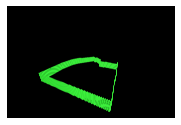

10-floors category confidence: 0.9434520602226257


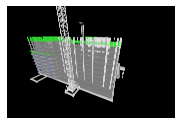

11-floors category confidence: 0.8136200904846191


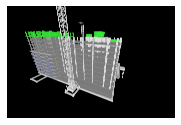

12-floors category confidence: 0.920647919178009


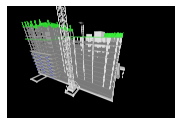

13-floors category confidence: 0.7095126509666443


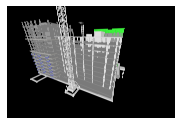

14-floors category confidence: 0.8940097689628601


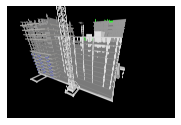

15-floors category confidence: 0.9999648332595825


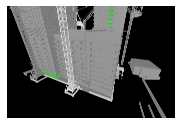

1-floor category confidence: 0.999991774559021


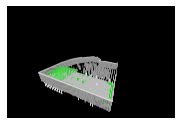

2-floors category confidence: 0.6840060949325562


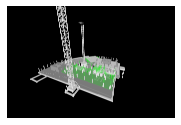

4-floors category confidence: 0.9738033413887024


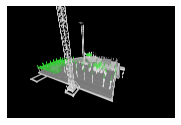

4-floors category confidence: 0.9004872441291809


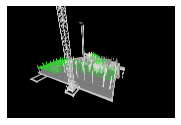

5-floors category confidence: 0.7886864542961121


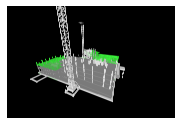

5-floors category confidence: 0.48100197315216064


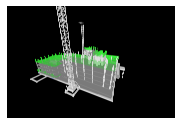

7-floors category confidence: 0.7355070114135742


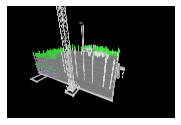

8-floors category confidence: 0.9458111524581909


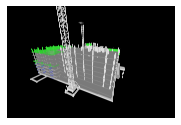

11-floors category confidence: 0.38784340023994446


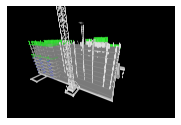

In [ ]:
for i in range(16):
    img = open_image(test_path/df.iloc[i]['fname'])
    print(df.iloc[i]['predicted_class'], 'category confidence:', df[df.iloc[i]['predicted_class']].iloc[i])
    img.show()
    plt.show()

In [ ]:
df.to_csv('/content/AEC-Demo/outputs/20200726_bim_predictions01.csv',index=False)